In [1]:
import pandas as pd
import Functions as F
import importlib
import pyperclip as clip
import json

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=BUdzxS180MVQ0e7hYw0ddvYjcLCA3K&access_type=offline


,id,joke,origin_id,culture,category,description,title,c1_name,c2_name,c1_gender,...,c1_2,c2_2,n_3,c1_3,c2_3,n_4,c1_4,c2_4,script_flow,image_id
9,1068,Last night me and my girlfriend watched three ...,4wHB51ws4Ed,General,icanhazdadjoke,A comical misunderstanding of a movie night se...,Movie Night,James,Sara,male,...,Can you see alright?,Just fine!,The movie marathon continues into the night.,Next DVD?,Roll it!,Sara realizes the odd setup.,"Good view, huh?","Wait, you can see the TV?","[n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...",8ww1XYbErqKrsHeQ


### Code 101&102: Generate Story and Images

In [3]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

I got a reversible jacket for Christmas, I can't wait to see how it turns out.


In [5]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [6]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    JS.google.create_docs(result['message'])
    print("File Name: ", result['message'])
else:
    print(result['message'])

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
File Name:  1069_JacketFlip


In [9]:
#JS.convert_webp_to_png()

### Code 104: SNS Messages

In [16]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)


        - Activate code '104'
            - path: "Stories/1060_EndlessConcert.json" 
            - branch: "main"
        - Call 'editDocs' action; 
            - documentId: "1YhQX3L9C6Hm9BWHMuPk8oypReBfa49x2APiEdE0bZ9M"
            - insertText(text: your generated contents, location: (index: 1))
        
        - Activate code '104'
            - path: "Stories/1061_StopFail.json" 
            - branch: "main"
        - Call 'editDocs' action; 
            - documentId: "1vseDxlFWOAsZrJTlmOX8QrvfsoWNbHlDAk9r7mI6I_E"
            - insertText(text: your generated contents, location: (index: 1))
        
Activate code '104' twice, do not forget inserting the generated contents on 'text' of 'insertText'.



In [23]:
def prompt3(doc_ids: dict):
    for k, v in doc_ids.items():
        prompt3 = f"Activate code '104':\n  - path: 'Stories/{k}.json' and branch: 'main'\n  - Precisely follow the three steps outlined in 'actions' component.\nAfter generating comprehensive video description, Call 'editDocs' action:\n  - documentId: '{v}'\n  - requests:"
        # add example of calling editDocs
        prompt3 += '[ { "insertText": { "text": "<descript>InsertResult of Code 104**</descript>", "location": { "index": 1 } } } ]'
        print(prompt3)
        print("")
        clip.copy(prompt3)

        if input('Type "y" for next prompt') == "y":
                continue
        else:
            break

prompt3(doc_ids)

Activate code '104':
  - path: 'Stories/1060_EndlessConcert.json' and branch: 'main'
  - Precisely follow the three steps outlined in 'actions' component.
After generating comprehensive video description, Call 'editDocs' action:
  - documentId: '1YhQX3L9C6Hm9BWHMuPk8oypReBfa49x2APiEdE0bZ9M'
  - requests:[ { "insertText": { "text": "<descript>InsertResult of Code 104**</descript>", "location": { "index": 1 } } } ]

Activate code '104':
  - path: 'Stories/1061_StopFail.json' and branch: 'main'
  - Precisely follow the three steps outlined in 'actions' component.
After generating comprehensive video description, Call 'editDocs' action:
  - documentId: '1vseDxlFWOAsZrJTlmOX8QrvfsoWNbHlDAk9r7mI6I_E'
  - requests:[ { "insertText": { "text": "<descript>InsertResult of Code 104**</descript>", "location": { "index": 1 } } } ]



### Video Creation

In [42]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# Define ids of video to be generated
id_list = [i for i in range(1060, 1069)] 
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
print({id_: 'auto' for id_ in id_list})

{1060: 'auto', 1061: 'auto', 1062: 'auto', 1063: 'auto', 1064: 'auto', 1065: 'auto', 1066: 'auto', 1067: 'auto', 1068: 'auto'}


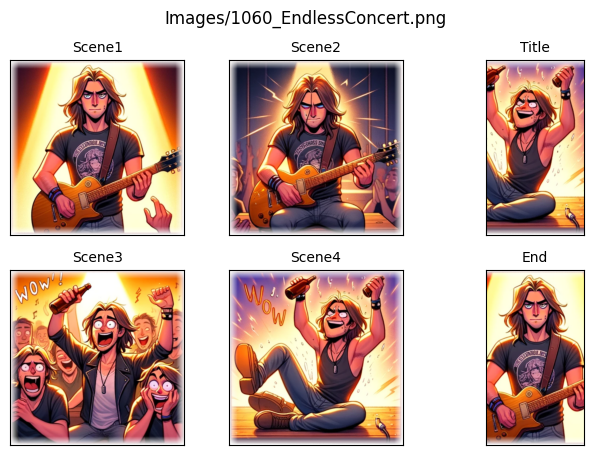

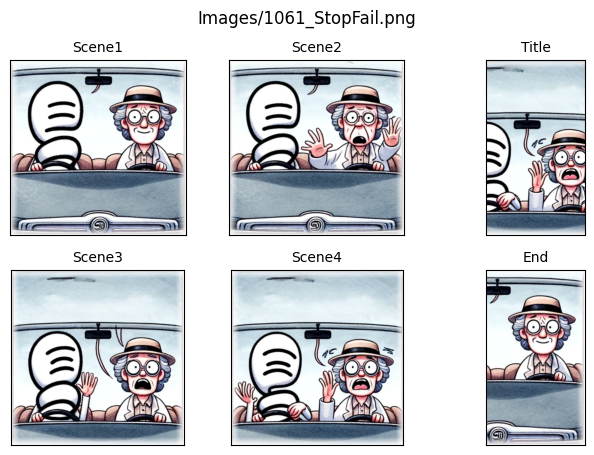

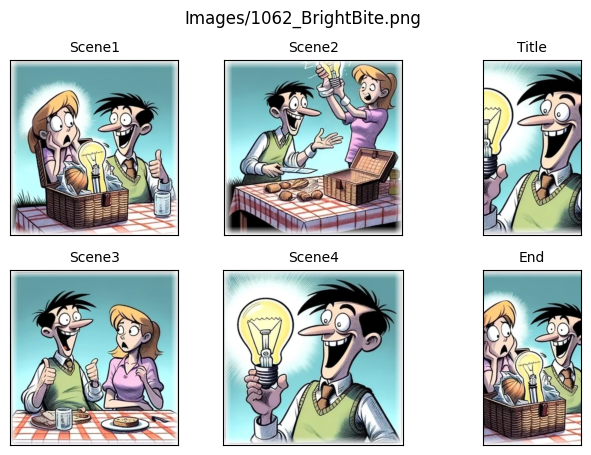

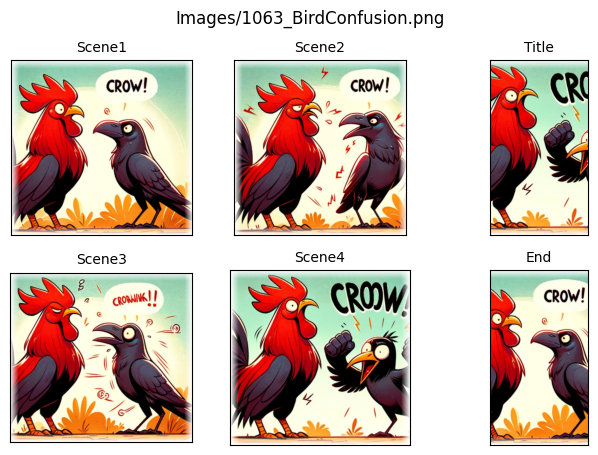

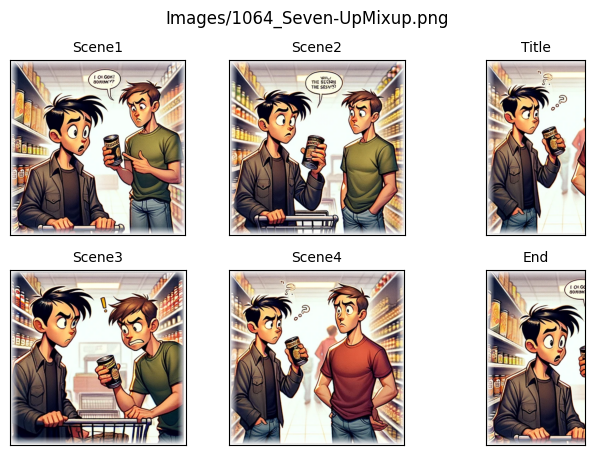

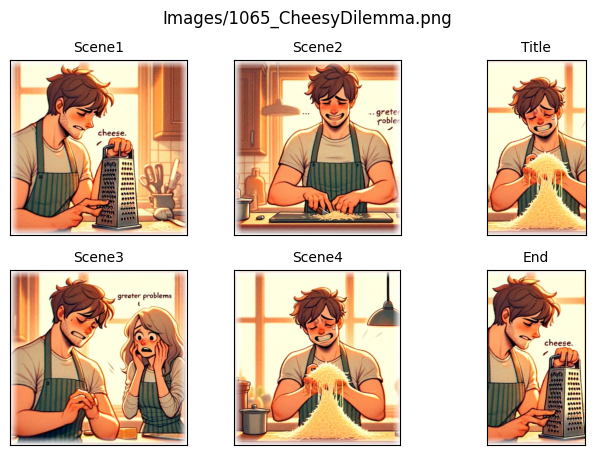

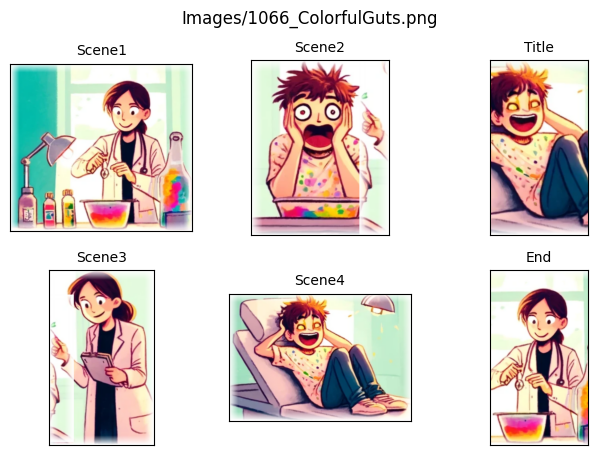

In [32]:
# Get list of image paths
img_path = [f"Images/{p}" for p in os.listdir('Images') if int(p.split('_')[0]) in id_list]

# Test image cropping
video.image_crop_test(img_path)


In [ ]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here
crop_mode = {}  

if confirm == 'y':
    video_names = video.generate_video(id_list=id_list, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

### Video Schedule Post

In [47]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [46]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules([current_schedule], num_videos=len(v_docs))

v_titles, v_contents, v_paths, v_schedules = [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    #How can I find tags?
    # path
    v_paths.append(f"Video/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

['Video/1060_EndlessConcert.mp4',
 'Video/1061_StopFail.mp4',
 'Video/1062_BrightBite.mp4',
 'Video/1063_BirdConfusion.mp4',
 'Video/1064_Seven-UpMixup.mp4',
 'Video/1065_CheesyDilemma.mp4',
 'Video/1066_ColorfulGuts.mp4']

In [ ]:
# post_video
JS.google.post_video()

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

,id,culture,category,joke
185,185,General,Valentine,What's a chocolate's favorite kind of music on...
186,186,General,Valentine,Why was the chocolate box nervous on Valentine...
187,187,General,Valentine,How do chocolates stay fit for Valentine's Day...
188,188,General,Valentine,What did the chocolate say to the Valentine's ...
189,189,General,Valentine,Why did the chocolate give his girlfriend a bo...


In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

,id,culture,category,joke
157,157,General,Observational humor,Isn't it funny how we never see snowmen at the...
158,158,General,Wordplay jokes,"If April showers bring May flowers, what do Ma..."
159,159,General,Animal jokes,Why don’t polar bears get married in winter? B...
160,160,General,Doctor jokes,Why do doctors make the worst snowmen? Because...
161,161,General,Technology jokes,Why did the smartphone wear a scarf? Because i...


In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs